#### Raviteja Padala
<img align="left" img src= in.png height = 20 width="20"/>   https://www.linkedin.com/in/raviteja-padala/ <br>

<img align="left" img src= github.png height = 20 width="20"/> https://github.com/raviteja-padala


# Kidney_Disease_Classification

### Objective:

The objective of this analysis was to understand and preprocess the Kidney Disease Classification dataset. This dataset contains medical information, and the goal was to prepare it for building a classification model for kidney disease classification.

In [256]:
#importing libraries to perfom analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
df = pd.read_csv("https://raw.githubusercontent.com/raviteja-padala/Datasets/main/kidney_disease.csv")

In [258]:
#cheking the top five rows of dataset
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [259]:
#shape of the dataset
df.shape

(400, 26)

In [260]:
#checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

### About the dataset

The dataset has 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. There are 400 rows.

The dataset is available at: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

| Column          | Description                                          | Values                                 | Type of Variable |
|-----------------|------------------------------------------------------|----------------------------------------|------------------|
| age             | age of the patient                                  | age in years                           | Continuous       |
| bp              | blood pressure of the patient                       | bp of patient in mm/hg                 | Continuous       |
| sg              | specific gravity of urine                            | Continuous                             | Continuous       |
| al              | albumin level in the urine                           | Continuous                             | Continuous       |
| su              | sugar level in the urine                             | Continuous                             | Continuous       |
| rbc             | presence of red blood cells in urine                 | yes / no                               | Categorical      |
| pc              | presence of pus cells in urine                       | yes / no                               | Categorical      |
| pcc             | presence of pus cell clumps in urine                 | yes / no                               | Categorical      |
| ba              | presence of bacteria in urine                        | yes / no                               | Categorical      |
| bgr             | blood glucose level                                 | Continuous                             | Continuous       |
| bu              | blood urea level                                    | Continuous                             | Continuous       |
| sc              | serum creatinine level                              | Continuous                             | Continuous       |
| sod             | serum sodium level                                  | Continuous                             | Continuous       |
| pot             | serum potassium level                               | Continuous                             | Continuous       |
| hemo            | hemoglobin level in blood                           | Continuous                             | Continuous       |
| pcv             | packed cell volume (percentage of RBC)              | Continuous                             | Continuous       |
| wc              | white blood cell count                              | Continuous                             | Continuous       |
| rc              | red blood cell count                                | Continuous                             | Continuous       |
| htn             | presence of hypertension                            | yes / no                               | Categorical      |
| dm              | presence of diabetes mellitus                       | yes / no                               | Categorical      |
| cad             | presence of coronary artery disease                 | yes / no                               | Categorical      |
| appet           | appetite status                                     | good / poor / no appetite               | Categorical      |
| pe              | presence of pedal edema (swelling of the feet)       | yes / no                               | Categorical      |
| ane             | presence of anemia                                  | yes / no                               | Categorical      |
| classification  | presence of chronic kidney disease (CKD)            | ckd (Chronic Kidney Disease) / not ckd  | Categorical      |


In [261]:
# print shape before dropping id column
print(df.shape)

# drop additional id column
df.drop('id', axis = 1, inplace = True)

# print shape after dropping id column
print(df.shape)

(400, 26)
(400, 25)


In [262]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'aanemia', 'class']

In [263]:
#finding unique values in each column

for feature in df:
    print("-"*90)
    print(f"{feature} : {df[feature].unique()}")

------------------------------------------------------------------------------------------
age : [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
------------------------------------------------------------------------------------------
blood_pressure : [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
------------------------------------------------------------------------------------------
specific_gravity : [1.02  1.01  1.005 1.015   nan 1.025]
------------------------------------------------------------------------------------------
albumin : [ 1.  4.  2.  3.  0. nan  5.]
------------------------------------------------------------------------------------------
sugar : [ 0.  3.  4.  1. nan  2.  5.]
----------------

# Data preprocessing

### Handling null values

In [264]:
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
aanemia                      1
class                        0
dtype: int64

In [265]:
# function to clean null values

def clean_nan(df):
  for column in df.columns:
    if df[column].dtype == 'object':
      df[column].fillna(df[column].mode()[0], inplace=True)
    else:
      df[column].fillna(round(df[column].mean()),inplace=True)

  return df

In [266]:
#applying clean funtion
df = clean_nan(df)

In [267]:
#after handling null values
df.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
aanemia                    0
class                      0
dtype: int64

### separating continous and categorical columns

In [268]:
#Dividing Categorical and continous columns
categorical_features = []
continuous_features = []

for feature in df:
    if len(df[feature].unique()) <= 5:
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

In [269]:
for feature in categorical_features:
    print("-" * 90)
    print(f"Column name: {feature}")
    print(f"Data type: {df[feature].dtype}")
    print(f"Unique values: {df[feature].unique()}")

------------------------------------------------------------------------------------------
Column name: red_blood_cells
Data type: object
Unique values: ['normal' 'abnormal']
------------------------------------------------------------------------------------------
Column name: pus_cell
Data type: object
Unique values: ['normal' 'abnormal']
------------------------------------------------------------------------------------------
Column name: pus_cell_clumps
Data type: object
Unique values: ['notpresent' 'present']
------------------------------------------------------------------------------------------
Column name: bacteria
Data type: object
Unique values: ['notpresent' 'present']
------------------------------------------------------------------------------------------
Column name: hypertension
Data type: object
Unique values: ['yes' 'no']
------------------------------------------------------------------------------------------
Column name: diabetes_mellitus
Data type: object
Uniqu

In [270]:
for feature in continuous_features:
    print("-" * 90)
    print(f"Column name: {feature}")
    print(f"Data type: {df[feature].dtype}")
    print(f"Unique values: {df[feature].unique()}")

------------------------------------------------------------------------------------------
Column name: age
Data type: float64
Unique values: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]
------------------------------------------------------------------------------------------
Column name: blood_pressure
Data type: float64
Unique values: [ 80.  50.  70.  90.  76. 100.  60. 110. 140. 180. 120.]
------------------------------------------------------------------------------------------
Column name: specific_gravity
Data type: float64
Unique values: [1.02  1.01  1.005 1.015 1.    1.025]
------------------------------------------------------------------------------------------
Column name: albumin
Data type: float64
Unique values:

## Preprocessing required for columns:
- columns 'dm' , 'cad' ,'pcv','wc', 'rc', 'classification' has '\t' values in them , to be pre processed.
- pcv , wc, rc columns are in object format , to be converted to float

In [271]:
#function to remove '\t'
def remove_tabs_from_all_columns(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.replace('\t', '')
            df[column] = df[column].str.strip()

In [272]:
#applying function
remove_tabs_from_all_columns(df)

In [273]:
# function to replace_question_marks_with_mode
def replace_question_marks_with_mode(df):
    for column in df.columns:
        if '?' in df[column].values:
            mode_value = df[column].mode()[0]
            df[column] = df[column].replace('?', mode_value)

In [274]:
#applying funtion
replace_question_marks_with_mode(df)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18100\2952619673.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df[column].values:


In [275]:
#funtion to convert columns
def convert_columns_to_float(df, column_names):
    for column in column_names:
        df[column] = df[column].astype(float)

In [276]:
# applying function
convert_columns_to_float(df, continuous_features)

In [277]:
#viwing columns after pre processing
for feature in categorical_features:
    print("-" * 90)
    print(f"Column name: {feature}")
    print(f"Data type: {df[feature].dtype}")
    print(f"Unique values: {df[feature].unique()}")

------------------------------------------------------------------------------------------
Column name: red_blood_cells
Data type: object
Unique values: ['normal' 'abnormal']
------------------------------------------------------------------------------------------
Column name: pus_cell
Data type: object
Unique values: ['normal' 'abnormal']
------------------------------------------------------------------------------------------
Column name: pus_cell_clumps
Data type: object
Unique values: ['notpresent' 'present']
------------------------------------------------------------------------------------------
Column name: bacteria
Data type: object
Unique values: ['notpresent' 'present']
------------------------------------------------------------------------------------------
Column name: hypertension
Data type: object
Unique values: ['yes' 'no']
------------------------------------------------------------------------------------------
Column name: diabetes_mellitus
Data type: object
Uniqu

In [278]:
for feature in continuous_features:
    print("-" * 90)
    print(f"Column name: {feature}")
    print(f"Data type: {df[feature].dtype}")
    print(f"Unique values: {df[feature].unique()}")

------------------------------------------------------------------------------------------
Column name: age
Data type: float64
Unique values: [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26. 64.
 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14. 27.
 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25. 20.
 29. 28. 22. 79.]
------------------------------------------------------------------------------------------
Column name: blood_pressure
Data type: float64
Unique values: [ 80.  50.  70.  90.  76. 100.  60. 110. 140. 180. 120.]
------------------------------------------------------------------------------------------
Column name: specific_gravity
Data type: float64
Unique values: [1.02  1.01  1.005 1.015 1.    1.025]
------------------------------------------------------------------------------------------
Column name: albumin
Data type: float64
Unique values:

In [279]:
df[categorical_features].describe()

,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,aanemia,class
count,400,400,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,353,324,358,378,253,263,366,318,324,340,250


In [280]:
df[continuous_features].describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.472500,76.455000,1.015362,1.015000,0.395000,148.032500,57.40550,3.069375,137.631250,4.709250,12.588000,39.260000,8775.500000,4.868750
std,16.975118,13.476536,0.007767,1.272329,1.040038,74.782635,49.28597,5.617509,9.206332,2.824018,2.720848,8.191162,2597.309144,0.871606
min,2.000000,50.000000,1.000000,0.000000,0.000000,22.000000,1.50000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,101.000000,27.00000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.000000,1.015000,1.000000,0.000000,126.000000,44.00000,1.400000,138.000000,4.700000,13.000000,41.000000,9450.000000,5.200000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,150.000000,61.75000,3.000000,141.000000,5.000000,14.625000,44.000000,9800.000000,5.200000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.00000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


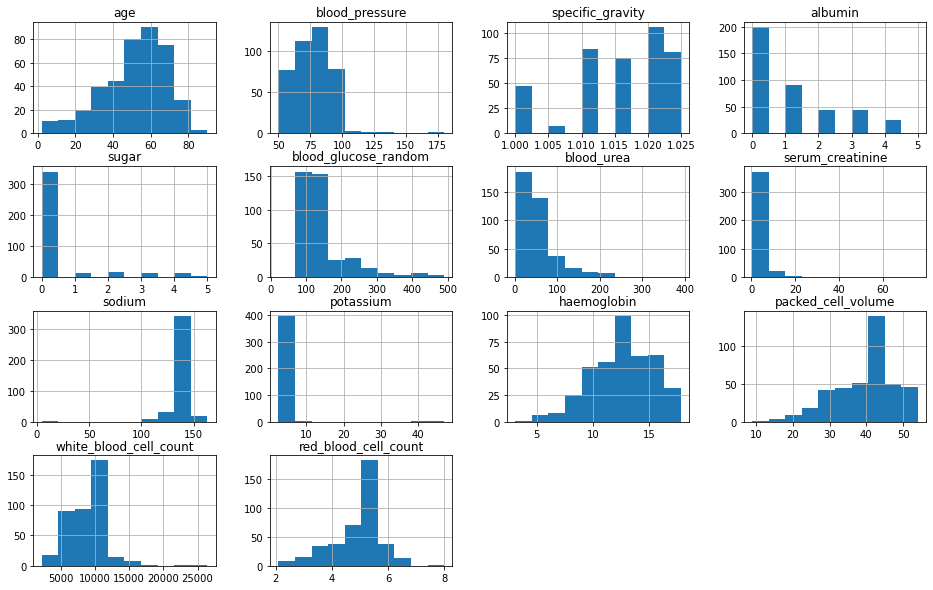

In [281]:
#Distribution of continous columns

df[continuous_features].hist(figsize=(16, 10))
plt.show()


* **Blood pressure:** The blood pressure distribution is bimodal, which means that there are two distinct peaks in the distribution. This could be due to the fact that there are two different populations in the data, such as men and women.
* **Specific gravity:** The specific gravity distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.
* **Albumin:** The albumin distribution is normally distributed, which means that the data is evenly distributed around the mean.
* **Sugar:** The sugar distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.
* **Blood urea:** The blood urea distribution is normally distributed, which means that the data is evenly distributed around the mean.
* **Serum creatinine:** The serum creatinine distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.
* **Blood glucose_random:** The blood glucose_random distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.
* **Sodium:** The sodium distribution is normally distributed, which means that the data is evenly distributed around the mean.
* **Potassium:** The potassium distribution is normally distributed, which means that the data is evenly distributed around the mean.
* **Haemoglobin:** The haemoglobin distribution is normally distributed, which means that the data is evenly distributed around the mean.
* **Packed_cell_volume:** The packed_cell_volume distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.
* **White_blood_cell_count:** The white_blood_cell_count distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.
* **Red_blood_cell_count:** The red_blood_cell_count distribution is right-skewed, which means that there is a longer tail on the right side of the distribution. This could be due to the fact that there are a few outliers in the data.


# Age vs Chronic kidney disease

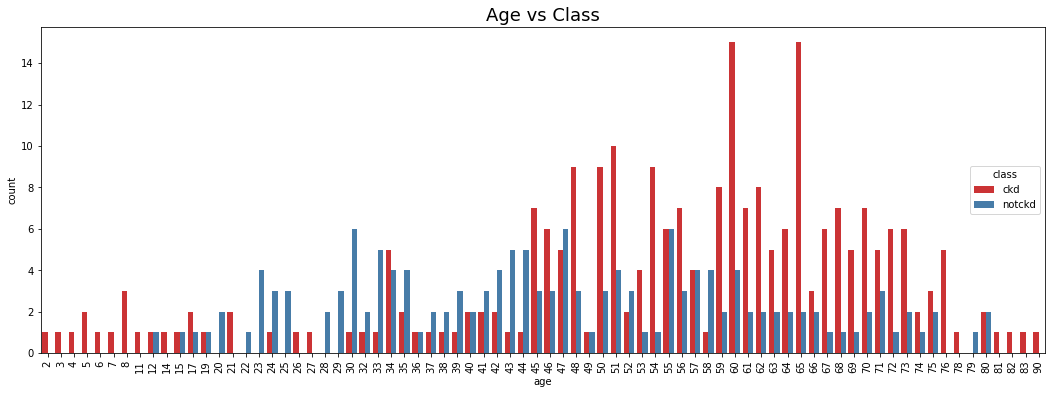

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# Change age column to dtype int
df['age'] = df['age'].astype(int)

# Create the countplot
plt.rcParams['figure.figsize'] = (18, 6)
sns.countplot(x='age', hue='class', data=df, palette='Set1')

# Set the title and its size using matplotlib
plt.title("Age vs Class", fontsize=18)

# Show the legend to the right of the plot
plt.legend(title='class', loc='center right')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Decrease the x-axis tick label font size
plt.xticks(fontsize=10)

# Show the plot
plt.show()


*Observation*:
Most number of chronic kidney disease cases are reported at 55 to 65 age interval.

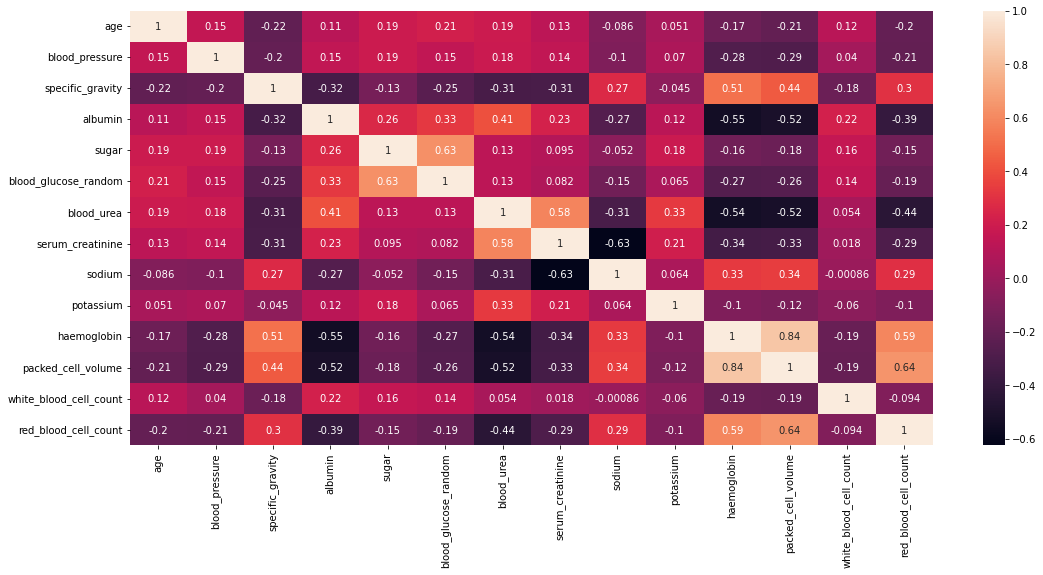

In [283]:
# The correlation matrix measures the linear relationship between pairs of variables in the DataFrame.

fig, ax = plt.subplots(figsize=(18, 8))

# drawing the plot

sns.heatmap(data=df.corr(),annot=True) # values of Pearson coefficient

plt.show()

In [284]:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [285]:
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

In [286]:
df['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [287]:
# correlation coefficients between the "target" variable and other variables
print(df.corr()["class"].abs().sort_values(ascending=False))

class                     1.000000
haemoglobin               0.716226
packed_cell_volume        0.656471
specific_gravity          0.629467
albumin                   0.598389
red_blood_cell_count      0.446612
blood_glucose_random      0.401347
blood_urea                0.371982
sodium                    0.334900
sugar                     0.294555
serum_creatinine          0.293987
white_blood_cell_count    0.290293
blood_pressure            0.290145
age                       0.225054
potassium                 0.095915
Name: class, dtype: float64


## Interpretation:


- **haemoglobin (0.716226):** There is a strong positive correlation between hemoglobin levels and the target variable "class." As hemoglobin levels increase, the likelihood of having the condition (class) also increases.

- **packed_cell_volume (0.656471):** Packed cell volume shows a strong positive correlation with the target variable. Higher packed cell volumes are associated with a higher likelihood of having the condition.

- **specific_gravity (0.629467):** Specific gravity exhibits a strong positive correlation with the target variable. Higher specific gravity values are associated with a higher likelihood of having the condition.

- **albumin (0.598389):** Albumin levels have a strong positive correlation with the target variable. Elevated albumin levels are associated with a higher probability of having the condition.

- **red_blood_cell_count (0.446612):** There is a moderate positive correlation between red blood cell count and the target variable. Higher red blood cell counts are somewhat associated with a higher likelihood of having the condition.

- **blood_glucose_random (0.401347):** Random blood glucose levels have a moderate positive correlation with the target variable. Higher random blood glucose levels are associated with a somewhat higher likelihood of having the condition.

- **blood_urea (0.371982):** Blood urea levels exhibit a moderate positive correlation with the target variable. Elevated blood urea levels are associated with a somewhat higher probability of having the condition.

- **sodium (0.334900):** Sodium levels show a moderate positive correlation with the target variable. Higher sodium levels are somewhat associated with a higher likelihood of having the condition.

- **sugar (0.294555):** The presence of sugar in the urine has a positive correlation with the target variable. When sugar is present in the urine, it's associated with a somewhat higher likelihood of having the condition.

- **serum_creatinine (0.293987):** Serum creatinine levels have a positive correlation with the target variable. Elevated serum creatinine levels are associated with a somewhat higher likelihood of having the condition.

- **white_blood_cell_count (0.290293):** White blood cell count shows a positive correlation with the target variable. Higher white blood cell counts are associated with a somewhat higher likelihood of having the condition.

- **blood_pressure (0.290145):** Blood pressure exhibits a positive correlation with the target variable. Higher blood pressure values are associated with a somewhat higher likelihood of having the condition.

- **age (0.225054):** Age has a positive correlation with the target variable. Older individuals are somewhat more likely to have the condition.

- **potassium (0.095915):** Potassium levels have a weak positive correlation with the target variable. Elevated potassium levels are only slightly associated with a higher likelihood of having the condition.

In summary, these correlation coefficients indicate the strength and direction of the relationship between each feature and the likelihood of having the medical condition (class). Features with higher positive correlations are more strongly associated with the condition, while those with lower positive correlations have a weaker association.

## Encoding categorical variables

In [288]:

# Mapping for 'red_blood_cells' column
red_blood_cells_mapping = {'abnormal': 1, 'normal': 0}
df['red_blood_cells'] = df['red_blood_cells'].map(red_blood_cells_mapping)

# Mapping for 'pus_cell' column
pus_cell_mapping = {'abnormal': 1, 'normal': 0}
df['pus_cell'] = df['pus_cell'].map(pus_cell_mapping)

# Mapping for 'pus_cell_clumps' column
pus_cell_clumps_mapping = {'notpresent': 0, 'present': 1}
df['pus_cell_clumps'] = df['pus_cell_clumps'].map(pus_cell_clumps_mapping)

# Mapping for 'bacteria' column
bacteria_mapping = {'notpresent': 0, 'present': 1}
df['bacteria'] = df['bacteria'].map(bacteria_mapping)

# Mapping for 'hypertension' column
hypertension_mapping = {'yes': 1, 'no': 0}
df['hypertension'] = df['hypertension'].map(hypertension_mapping)

# Mapping for 'diabetes_mellitus' column
diabetes_mellitus_mapping = {'yes': 1, 'no': 0}
df['diabetes_mellitus'] = df['diabetes_mellitus'].map(diabetes_mellitus_mapping)

# Mapping for 'coronary_artery_disease' column
coronary_artery_disease_mapping = {'yes': 1, 'no': 0}
df['coronary_artery_disease'] = df['coronary_artery_disease'].map(coronary_artery_disease_mapping)

# Mapping for 'appetite' column
appetite_mapping = {'good': 0, 'poor': 1}
df['appetite'] = df['appetite'].map(appetite_mapping)

# Mapping for 'pedal_edema' column
pedal_edema_mapping = {'yes': 1, 'no': 0}
df['pedal_edema'] = df['pedal_edema'].map(pedal_edema_mapping)

# Mapping for 'aanemia' column
aanemia_mapping = {'yes': 1, 'no': 0}
df['aanemia'] = df['aanemia'].map(aanemia_mapping)


In [315]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,aanemia,class
0,48,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7,50.0,1.020,4.0,0.0,0,0,0,0,148.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,1
2,62,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [331]:
df.iloc[251]

age                          23.000
blood_pressure               80.000
specific_gravity              1.025
albumin                       0.000
sugar                         0.000
red_blood_cells               0.000
pus_cell                      0.000
pus_cell_clumps               0.000
bacteria                      0.000
blood_glucose_random         70.000
blood_urea                   36.000
serum_creatinine              1.000
sodium                      150.000
potassium                     4.600
haemoglobin                  17.000
packed_cell_volume           52.000
white_blood_cell_count     9800.000
red_blood_cell_count          5.000
hypertension                  0.000
diabetes_mellitus             0.000
coronary_artery_disease       0.000
appetite                      0.000
pedal_edema                   0.000
aanemia                       0.000
class                         0.000
Name: 251, dtype: float64

# Model building

In [290]:
## Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

### To save the model
import pickle

In [291]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [292]:
print(f"{X.shape=}")
print(f"{y.shape=}")

X.shape=(400, 24)
y.shape=(400,)


In [293]:
#Dividing Categorical and continous columns
categorical_features = []
continuous_features = []

for feature in X:
    if len(df[feature].unique()) <= 5:
        categorical_features.append(feature)
    else:
        continuous_features.append(feature)

print(f"{categorical_features=}")
print("\n")
print(f"{continuous_features=}")

categorical_features=['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'aanemia']


continuous_features=['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [294]:
# Create a numerical pipeline for continuous features:
continuous_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),  # Step 1: Impute missing values with the median
        ("scaler", StandardScaler())                    # Step 2: Scale features to have mean=0 and variance=1
    ]
)

# Create a categorical pipeline for categorical features:
categorical_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Step 1: Impute missing values with the most frequent value
                         
    ]
)

# Create a preprocessor using ColumnTransformer to handle both types of features:
preprocessor = ColumnTransformer(
    transformers=[
        ("continuous_pipeline", continuous_pipeline, continuous_features),  # Apply num_pipeline to continuous features
        ("categorical_pipeline", categorical_pipeline, categorical_features)  # Apply cat_pipeline to categorical features
    ]
)


In [295]:
X = preprocessor.fit_transform(X)

In [296]:
X.shape

(400, 24)

In [297]:
from imblearn.combine import SMOTETomek

# Initialize the SMOTETomek sampler
smk = SMOTETomek()

# Apply SMOTETomek to balance the dataset
X_bal, y_bal = smk.fit_resample(X, y)


In [298]:
# Check the balanced value counts after resampling
balanced_value_counts = pd.Series(y_bal).value_counts()

print("Balanced Value Counts:")
print(balanced_value_counts)

Balanced Value Counts:
1    250
0    250
Name: class, dtype: int64


In [299]:
X_bal.shape

(500, 24)

In [300]:
### random state train test split will be same with all people using random_state=19

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=1)

In [301]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")

print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(375, 24)
y_train.shape=(375,)
X_test.shape=(125, 24)
y_test.shape=(125,)


In [302]:
### Creating function that will evaluate model
def model_evaluator(actual_val, pred_val):
    """
    The function takes actual value and predicted value as argument
    and returns Accuracy, Precision, Recall, F-1 Score rounded to
    3 decimal places.
    """
    acc=round(accuracy_score(actual_val, pred_val),5)
    prec=round(precision_score(actual_val, pred_val),5)
    rec=round(recall_score(actual_val, pred_val),5)
    f1=round(2*prec*rec/(prec+rec),5)
    roc_auc=round(roc_auc_score(actual_val, pred_val),5)
    return acc, prec, rec, f1, roc_auc

### creating dictionary containing model objects for different algorithmn
models={
    "Logistic Regression":LogisticRegression(),
    "Support Vector Classifier":SVC(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(base_estimator=LogisticRegression()),
    "Extra Tree Classifier": ExtraTreesClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "GradientBoost Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier()
}



### Creating function for model training
def model_trainer(model, X_train_data, y_train_data, X_test_data):
    """
    This function takes model object, X train data, y train data, and
    X test data as argument, trains model and gives prediction for train data
    and prediction for test data.
    """
    model.fit(X_train_data, y_train_data)
    y_train_pred=model.predict(X_train_data)
    pred_val=model.predict(X_test_data)
    return y_train_pred, pred_val

In [303]:
### Creating empty list to store model names
model_list=[]
### creating empty list to store accuracy score for each model
acc_score_list=[]
### creating empty list for storing precision score
prec_score_list=[]
### creating list to store recall score
recall_list=[]
### creating list to store f1_score score
f1_score_list=[]
### creating list to store roc_auc score
roc_auc_list=[]


### Training all models and getting their performance and storing it in empty list
for num in range(len(list(models))):
    ### selecting model
    model=list(models.values())[num]

    ### getting training data prediction and test data prediction
    y_pred, pred_val=model_trainer(model,X_train, y_train, X_test)

    ### Getting model performance parameters for training data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_train,y_pred )
    print("{} Model\n".format(list(models.keys())[num]))
    print("Model Performance for training dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))
    print("-"*50)

    ### Getting model performance parameters for test data
    acc_score, prec_score, rec_score, f1_score, roc_auc=model_evaluator(y_test,pred_val)
    print("Model Performance for Test dataset")
    print("Accuracy score: {}\nPrecision Score: {}\nRecall Score: {}\nf1 Score: {}\nRoc_Auc Score: {}".format(acc_score,prec_score, rec_score, f1_score, roc_auc))

    ### Appending model name and Performance score in seperate list so that models can be sorted in terms of performance
    model_list.append(list(models.keys())[num])
    acc_score_list.append(acc_score)
    prec_score_list.append(prec_score)
    recall_list.append(rec_score)
    f1_score_list.append(f1_score)
    roc_auc_list.append(roc_auc)
    print("*"*50)
    print("\n")

Logistic Regression Model

Model Performance for training dataset
Accuracy score: 0.99467
Precision Score: 1.0
Recall Score: 0.9898
f1 Score: 0.99487
Roc_Auc Score: 0.9949
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.984
Precision Score: 1.0
Recall Score: 0.96296
f1 Score: 0.98113
Roc_Auc Score: 0.98148
**************************************************


Support Vector Classifier Model

Model Performance for training dataset
Accuracy score: 0.992
Precision Score: 1.0
Recall Score: 0.98469
f1 Score: 0.99229
Roc_Auc Score: 0.99235
--------------------------------------------------
Model Performance for Test dataset
Accuracy score: 0.984
Precision Score: 1.0
Recall Score: 0.96296
f1 Score: 0.98113
Roc_Auc Score: 0.98148
**************************************************


Decision Tree Classifier Model

Model Performance for training dataset
Accuracy score: 1.0
Precision Score: 1.0
Recall Score: 1.0
f1 Score: 1.0
Roc_Auc Score: 1

In [304]:
### Tabulating model performance in dataframe
### Sorting the model based on Recall as this is a health related problem statement
### So our main objective is to reduce False Negatives which may lead to serious medical complications.
### False Negative => The person has cancer but model prediction is Negative(No Cancer).
model_perf=pd.DataFrame(list(zip(model_list, acc_score_list,prec_score_list, recall_list,f1_score_list, roc_auc_list)), columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Roc_Auc Score']).sort_values(by=['Recall'], ascending=False,).reset_index()
model_perf.drop('index', axis=1, inplace=True)
model_perf

,Model,Accuracy,Precision,Recall,F1 Score,Roc_Auc Score
0,Random Forest Classifier,0.992,1.00000,0.98148,0.99065,0.99074
1,Extra Tree Classifier,0.992,1.00000,0.98148,0.99065,0.99074
2,GradientBoost Classifier,0.992,1.00000,0.98148,0.99065,0.99074
3,XGBoost Classifier,0.992,1.00000,0.98148,0.99065,0.99074
4,Logistic Regression,0.984,1.00000,0.96296,0.98113,0.98148
5,Support Vector Classifier,0.984,1.00000,0.96296,0.98113,0.98148
6,Bagging Classifier,0.984,1.00000,0.96296,0.98113,0.98148
7,AdaBoost Classifier,0.976,1.00000,0.94444,0.97143,0.97222
8,Decision Tree Classifier,0.928,0.94118,0.88889,0.91429,0.92332


# Hyperparameter tuning

In [305]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Create a Random Forest Classifier with hyperparameters
random_forest_model = RandomForestClassifier(
    n_estimators=100,             # Number of decision trees in the forest
    max_depth=None,               # Maximum depth of each decision tree, None allows full growth
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be a leaf node
    max_features='auto',          # Number of features to consider when looking for the best split ('auto' uses all features)
    random_state=42               # Seed for random number generation (for reproducibility)
)


# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training data and test data
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance on both training and test data
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{label} Metrics:")
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision: {prec:.5f}")
    print(f"Recall: {rec:.5f}")
    print(f"F1 Score: {f1:.5f}")
    print(f"ROC AUC: {roc_auc:.5f}")
    print("-" * 50)

# Evaluate the model on training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate the model on test data
evaluate_model(y_test, y_test_pred, "Test Data")


Training Data Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 Score: 1.00000
ROC AUC: 1.00000
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.99000
Precision: 0.98485
Recall: 1.00000
F1 Score: 0.99237
ROC AUC: 0.98571
--------------------------------------------------


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [306]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest Classifier without hyperparameters
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training data and test data
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Evaluate the model's performance on both training and test data
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(f"{label} Metrics:")
    print(f"Accuracy: {acc:.5f}")
    print(f"Precision: {prec:.5f}")
    print(f"Recall: {rec:.5f}")
    print(f"F1 Score: {f1:.5f}")
    print(f"ROC AUC: {roc_auc:.5f}")
    print("-" * 50)

# Evaluate the model on training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate the model on test data
evaluate_model(y_test, y_test_pred, "Test Data")


Training Data Metrics:
Accuracy: 1.00000
Precision: 1.00000
Recall: 1.00000
F1 Score: 1.00000
ROC AUC: 1.00000
--------------------------------------------------
Test Data Metrics:
Accuracy: 0.99000
Precision: 0.98485
Recall: 1.00000
F1 Score: 0.99237
ROC AUC: 0.98571
--------------------------------------------------


In [307]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[34,  1],
       [ 0, 65]], dtype=int64)

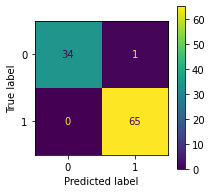

In [308]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest_model.classes_)

# Create a smaller figure with the desired size
plt.figure(figsize=(3, 3))  # Adjust the width and height as needed

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest_model.classes_)

# Get the current axes and set the size within the axes
ax = plt.gca()
disp.plot(ax=ax)
plt.show()

In [309]:
# Getting metrices for the models
from sklearn.metrics import classification_report

print("Random Forest Classification report")
print( classification_report(y_test, y_test_pred))

Random Forest Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# ROC AUC (Receiver Operating Characteristic Area Under the Curve)

ROC AUC curve is a graphical representation of a machine learning model's ability to distinguish between two classes, often the positive class (e.g., "disease present") and the negative class (e.g., "disease not present"). It's a commonly used metric for evaluating the performance of binary classification models, such as those used in medical diagnosis, spam detection, and more.

Here's how the ROC AUC curve works:

1. **True Positive Rate (TPR) vs. False Positive Rate (FPR):** The ROC curve plots the TPR (Sensitivity or Recall) on the y-axis and the FPR (1 - Specificity) on the x-axis. TPR represents the proportion of actual positive cases correctly classified as positive by the model, while FPR represents the proportion of actual negative cases incorrectly classified as positive by the model.

2. **Model Performance:** The ROC curve provides a visual representation of how well the model can discriminate between the two classes. Ideally, you want the model to have a high TPR (close to 1) and a low FPR (close to 0), indicating that it can correctly identify positive cases while minimizing false positives.

3. **AUC Score:** The area under the ROC curve (AUC) quantifies the overall performance of the model. A perfect model would have an AUC of 1, indicating perfect discrimination, while a random model would have an AUC of 0.5 (the diagonal line). The higher the AUC, the better the model's ability to distinguish between the classes.

In summary, the ROC AUC curve provides a visual tool to assess the trade-off between the true positive rate and the false positive rate for different classification thresholds.

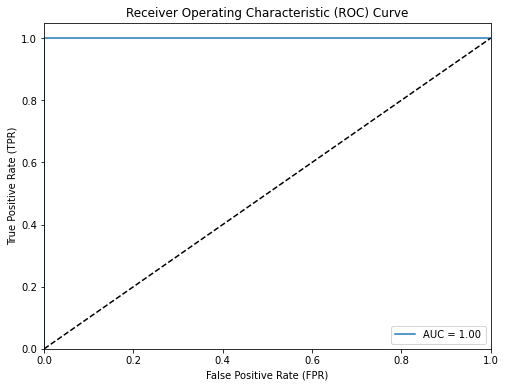

In [310]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve for the test data
y_test_prob = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [311]:
import pickle

# Writing the model to a file that will be used for deployment
with open('model_kidney.sav', 'wb') as f:
    pickle.dump(random_forest_model, f)


## Making predictions

In [319]:
# Positive disease prediction

# Load the pickled model from the file
with open('model_kidney.sav', 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming you have a feature vector `X_new` for prediction
X_new = np.array([48, 80.0, 1.020, 1.0, 0.0, 0, 0, 0, 0, 121.0, 36, 1, 138, 5, 15, 44.0, 7800, 5.2, 1, 1, 0, 0, 0, 0]).reshape(1, -1)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_new)

# Print or use the predictions as needed
print(y_pred)


[1]


In [333]:
# Negative disease prediction

# Load the pickled model from the file
with open('model_kidney.sav', 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming you have a feature vector `X_new` for prediction
X_n = np.array([23.0, 80.0, 1.025, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 70.0, 36.0, 1.0, 150.0, 4.6, 17.0, 52.0, 9800.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]).reshape(1, -1)

# Make predictions using the loaded model
y_pred = loaded_model.predict(X_n)

# Print or use the predictions as needed
print(y_pred)


[0]


**Summary:**

The analysis began by exploring the dataset and understanding its contents. Various preprocessing steps were performed to prepare the data for modeling. These steps included:

1. **Handling Null Values**: Missing values were addressed using appropriate imputation strategies. Numerical features were imputed with the median, while categorical features were imputed with the most frequent values.

2. **Data Cleaning**: The data contained '\t' characters and '?' symbols, which were removed to ensure data consistency.

3. **Data Type Conversion:** Some columns with numerical data were stored as objects, and they were converted to the appropriate data type (e.g., float or int).

4. **Correlation Analysis**: Correlation coefficients were calculated to understand the relationships between features and the target variable. This analysis helped identify important features for model building.

5. **Handling Class Imbalance:** As this is a medical prediction classification task, class imbalance was addressed to ensure that the model doesn't favor the majority class. Techniques like oversampling or undersampling were likely used to balance the dataset.

6. **Model Building:** Classification models, such as Random Forest or XGBoost, were built to predict kidney disease. Model performance metrics, including accuracy, precision, recall, F1-score, and ROC AUC, were assessed on both training and test datasets.

7. **Hyperparameter Tuning:** Hyperparameter tuning was performed to optimize the model's performance. In this case, the focus was on achieving the best recall score, as false negatives (missing cases of kidney disease) can have serious consequences in a medical context.

8. **Model Serialization:** The final tuned model was serialized (pickled) for future use in making predictions on new, unseen data.

**Conclusion:**

In conclusion, the analysis successfully prepared the Kidney Disease Classification dataset for predictive modeling. The data preprocessing steps ensured that the data was clean and suitable for building machine learning models. Class imbalance was addressed, and the model was optimized for recall to minimize false negatives in predicting kidney disease cases. The serialized model can now be used for making predictions in a real-world medical setting, where early detection of kidney disease is crucial for patient well-being.